# Growth Tutorial Overview

This barebones tutorial will walk you through the steps needed to perform a single tissue growth simulation, visualize the resultant synthetic cell culture, and generate synthetic fluorescence measurement data. 

**<font color='red'>Please note that documentation for this project is very sparse as this package is not intended for open-source distribution. We are simply making the code available so other researchers may reproduce the results published in our Fly-QMA manuscript.</font>**

### Running a growth simulation

In [10]:
from growth import Culture

# define a target culture size
num_cells = 100 

# initialize a synthetic cell culture
culture = Culture(reference_population=num_cells)

# run the growth simulation
culture.grow(min_population=num_cells, division_rate=0.1, recombination_rate=0.1)

### Visualizing a synthetic cell culture

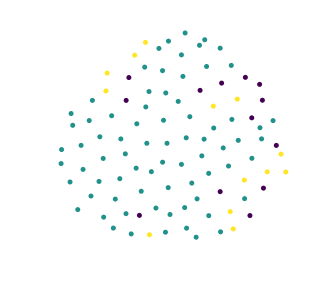

In [2]:
# visualize the synthetic cell culture
culture.plot(colorby='genotype', s=25)

In [6]:
%%capture

# animate the entire simulation
video = culture.animate(interval=200, colorby='genotype', s=25, repeat_delay=5000)

In [7]:
from IPython.core.display import HTML

HTML(video)

### Generating synthetic fluorescence measurements

In [8]:
# generate synthetic fluorescence measurements
measurements = culture.measure(ambiguity=0.1)
measurements.head()

,x,y,true_dosage,expression_capacity,nuclear_stain,nuclear_stain_std,clonal_marker,clonal_marker_std,control,control_std
0,-0.136131,0.834401,1,-1.108560,2.047264,0.0,1.027543,0.0,0.545632,0.0
1,0.062521,0.777367,1,0.025286,1.518245,0.0,0.980780,0.0,0.429824,0.0
2,-0.401521,0.577057,0,0.409476,2.351456,0.0,0.415020,0.0,0.368838,0.0
3,-0.425625,0.375288,0,-0.107101,3.349208,0.0,0.462921,0.0,0.603328,0.0
4,-0.603789,0.458942,2,0.061359,2.402798,0.0,2.082987,0.0,0.629938,0.0


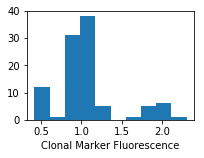

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(3, 2))
_ = ax.hist(measurements.clonal_marker, bins=10)
_ = ax.set_xlabel('Clonal Marker Fluorescence')